# Seaborn
Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Library documentation: http://stanford.edu/~mwaskom/software/seaborn/

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Themes

In [41]:
# global config settings to control things like style, font size, color palette etc.
sb.set(context="notebook", style="darkgrid", palette="dark")


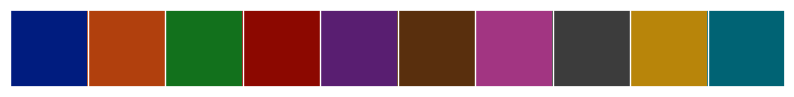

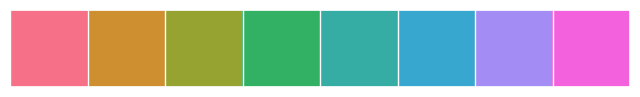

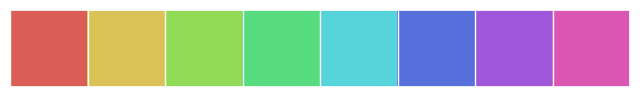

In [42]:
# seaborn has some nice built-in color palette features
sb.palplot(sb.color_palette())
sb.palplot(sb.color_palette("husl", 8))
sb.palplot(sb.color_palette("hls", 8))

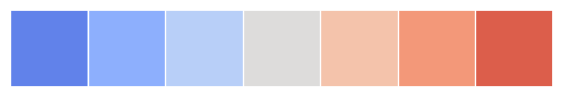

In [43]:
# matplotlib colormap of evenly spaced colors
sb.palplot(sb.color_palette("coolwarm", 7))

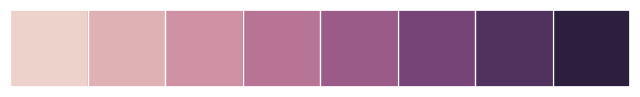

In [44]:
# sequential palette with linear increase in brightness
sb.palplot(sb.cubehelix_palette(8))

# Advanced Plots

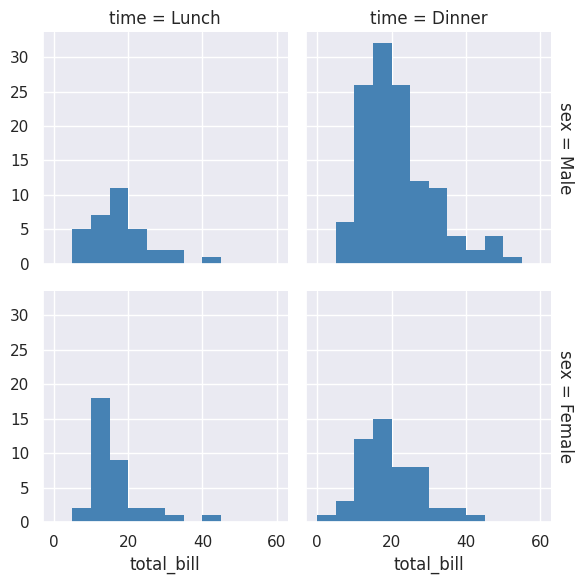

In [45]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

tips = sb.load_dataset("tips")
g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

<ipython-input-46-0c57c718c407>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
<ipython-input-46-0c57c718c407>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
<ipython-input-46-0c57c718c407>:14: Us

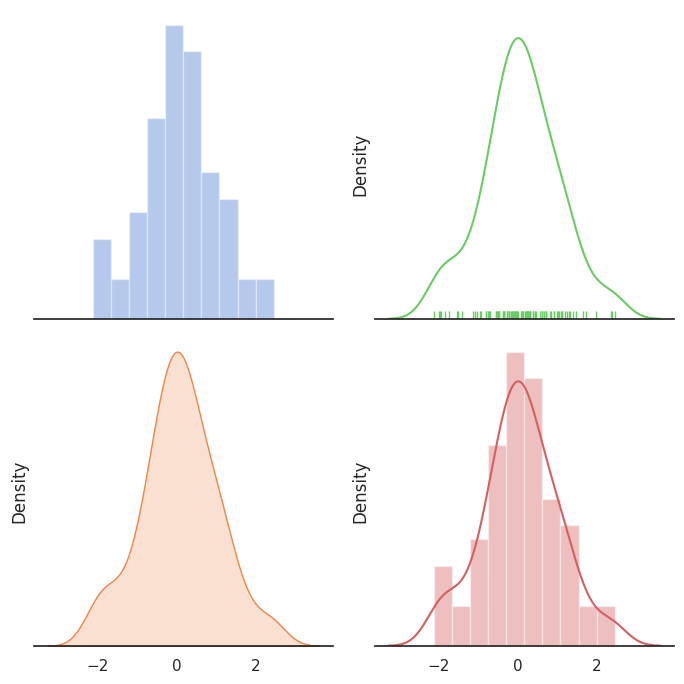

In [46]:
# several distribution plot examples
sb.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

rs = np.random.RandomState(10)

b, g, r, p = sb.color_palette("muted", 4)

d = rs.normal(size=100)

sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sb.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sb.distplot(d, color=p, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()


Text(0.7, 0.9, "Kendall's tau = -0.34\np-value = 1.8e-59")

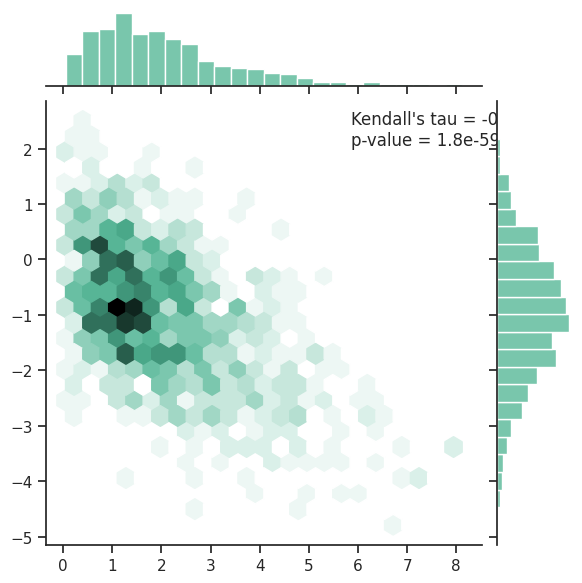

In [47]:
from scipy.stats import kendalltau
sb.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
tau, p_value = kendalltau(x, y)
g = sb.jointplot(x=x, y=y, kind="hex", color="#4CB391")
g.ax_joint.annotate("Kendall's tau = {:.2f}\np-value = {:.2g}".format(tau, p_value),
                     xy=(.7, .9), xycoords=g.ax_joint.transAxes)


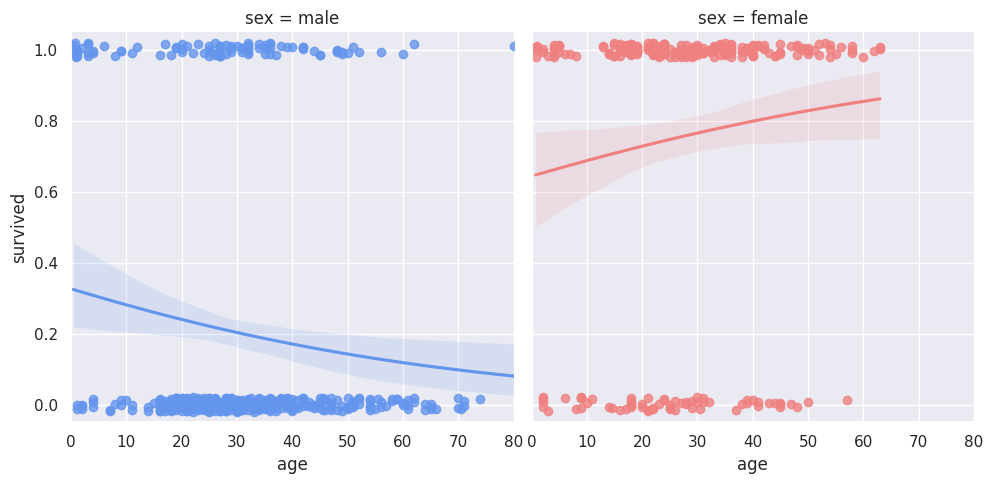

In [48]:
# faceted logistic regression
sb.set(style="darkgrid")
df = sb.load_dataset("titanic")

pal = dict(male="#6495ED", female="#F08080")
g = sb.lmplot(x="age", y="survived", col="sex", hue="sex",
              data=df, palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))


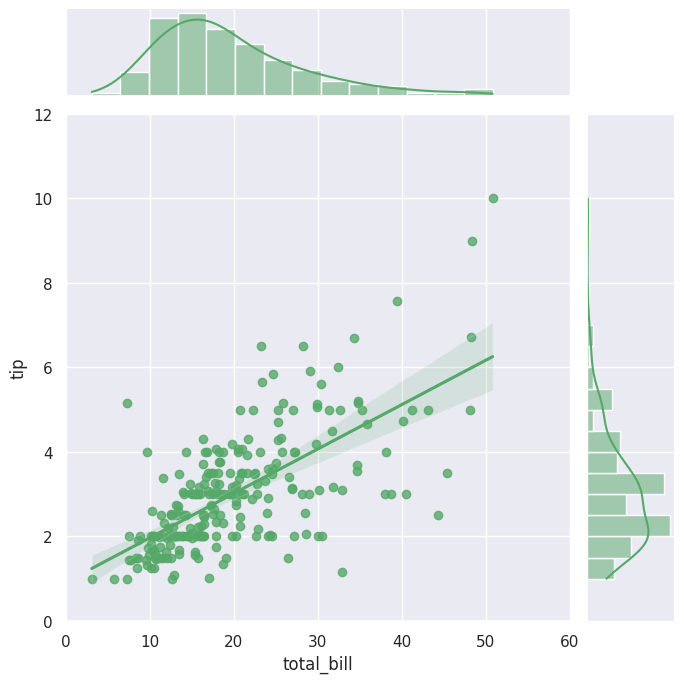

In [49]:
# linear regression with marginal distributions
sb.set(style="darkgrid")
tips = sb.load_dataset("tips")
color = sb.color_palette()[2]
g = sb.jointplot(x="total_bill", y="tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, height=7)


<ipython-input-50-900854ca51f9>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sb.catplot(x="year", data=planets, palette="BuPu",


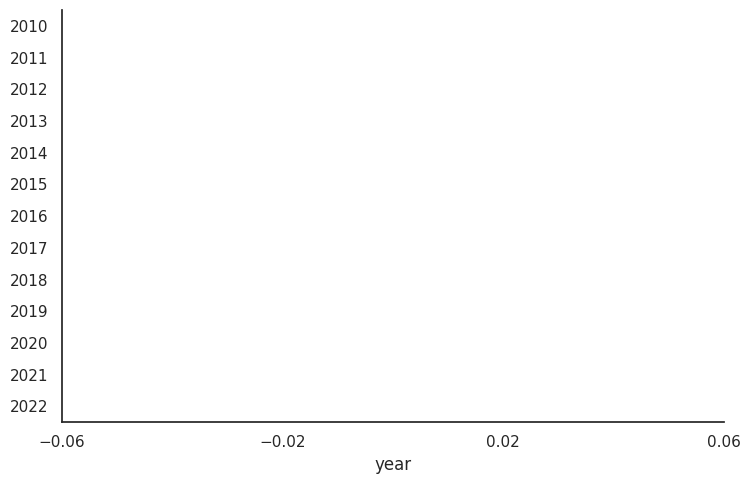

In [50]:
# time series factor plot
sb.set(style="white")
planets = sb.load_dataset("planets")
years = np.arange(2010, 2023)
g = sb.catplot(x="year", data=planets, palette="BuPu",
                   aspect=1.5, order=years)
g.set_xticklabels(step=2)

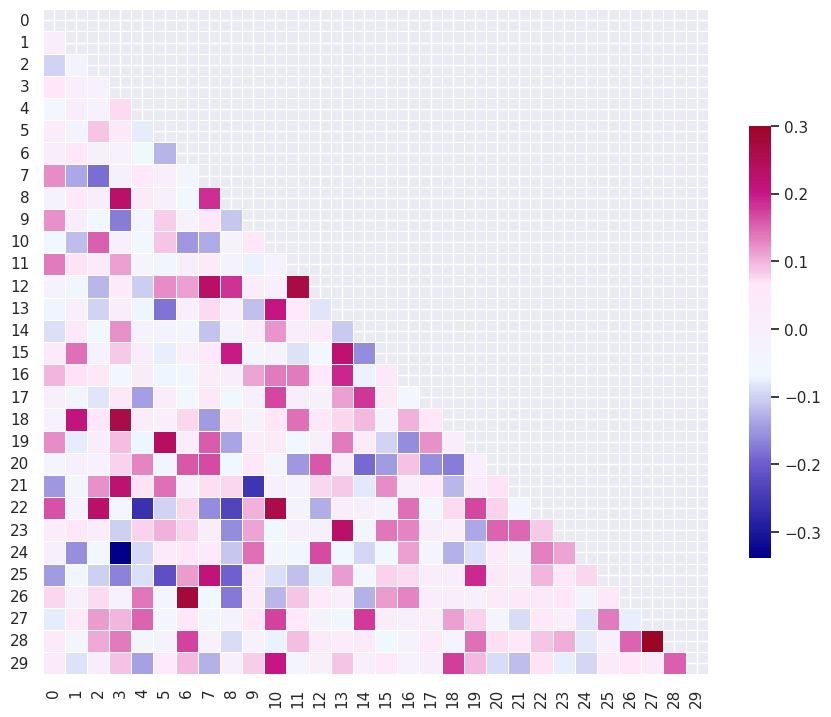

In [51]:
# correlation matrix
sb.set(style="darkgrid")

rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

corr = np.corrcoef(d.T)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 9))
cmap = sb.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
f.tight_layout()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


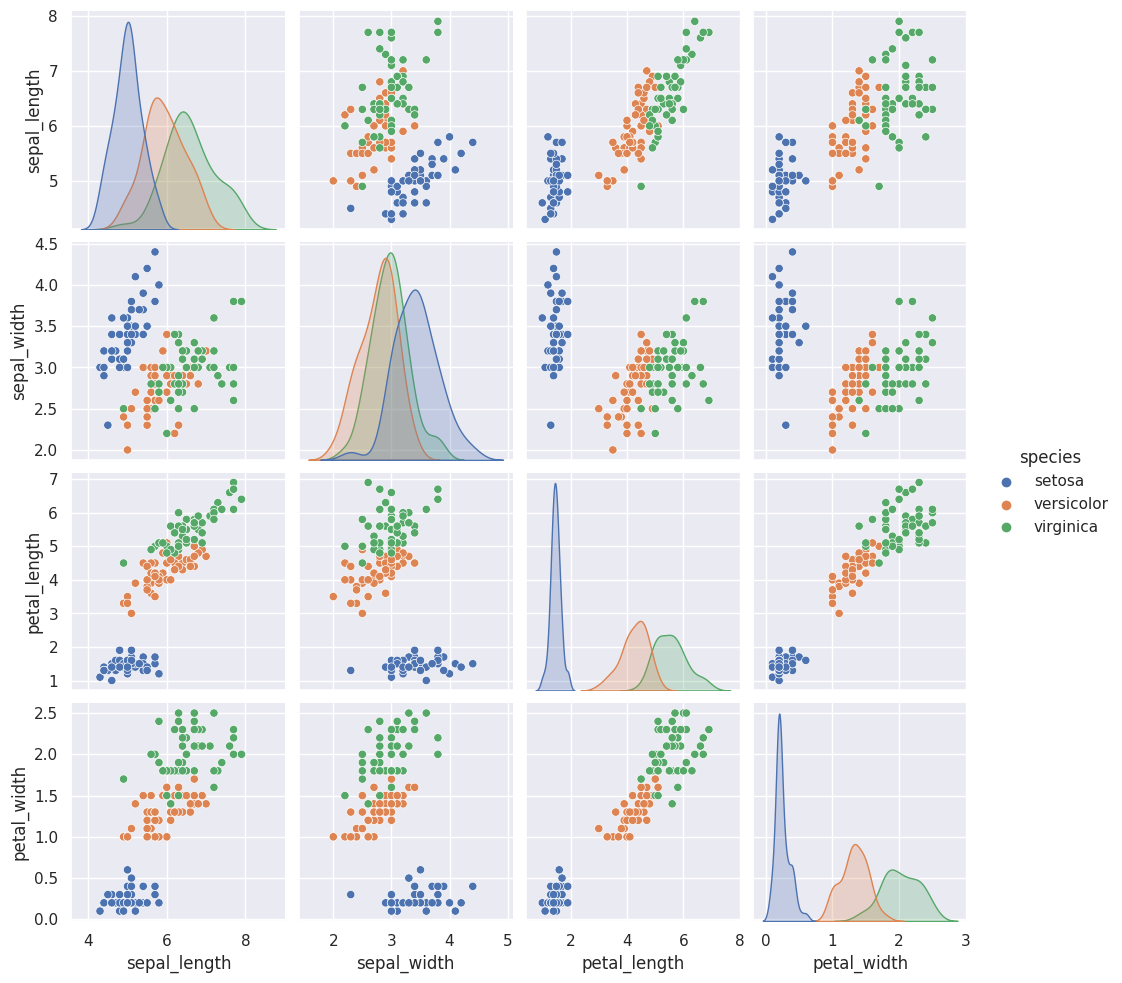

In [52]:
# pair plot example
sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.pairplot(df, hue="species", size=2.5)
